# DATA PREPROCESSING

###Importing necessary libraries and packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from warnings import filterwarnings
filterwarnings('ignore')

####Data Reading

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/CodSoft Projects/IRIS.csv')

In [ ]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###Checking for any missing or null values

In [ ]:
dataset.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###Plotting features

<Axes: xlabel='species', ylabel='Count'>

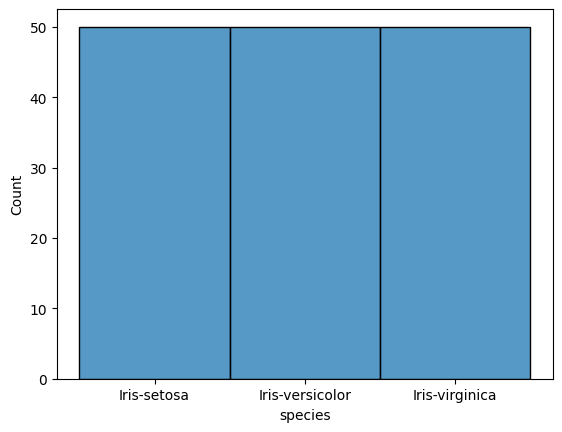

In [ ]:
sns.histplot(dataset['species'])

<Axes: xlabel='sepal_length', ylabel='Count'>

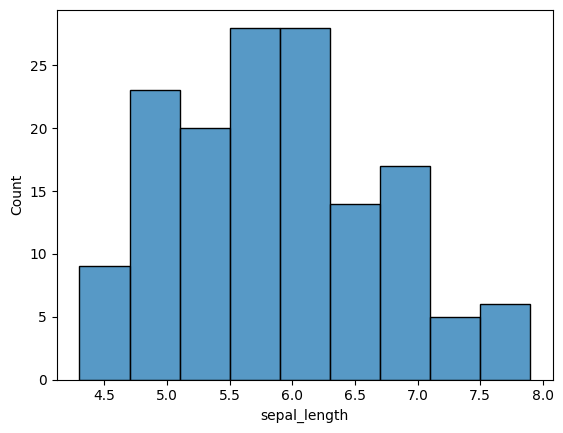

In [ ]:
sns.histplot(dataset['sepal_length'])

<Axes: xlabel='sepal_width', ylabel='Count'>

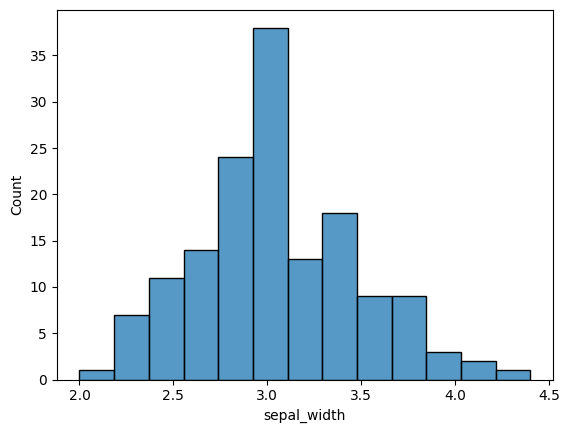

In [ ]:
sns.histplot(dataset['sepal_width'])

<Axes: xlabel='petal_width', ylabel='Count'>

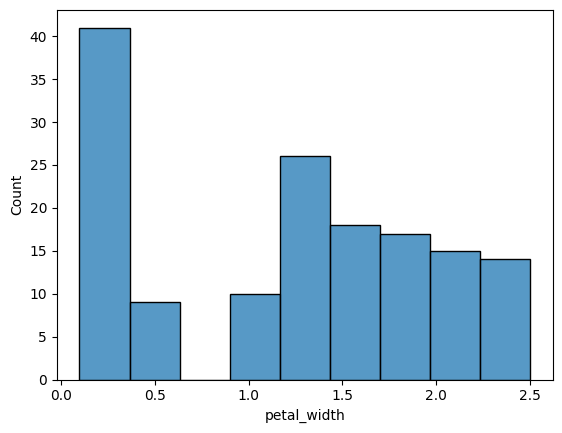

In [ ]:
sns.histplot(dataset['petal_width'])

<Axes: xlabel='petal_length', ylabel='Count'>

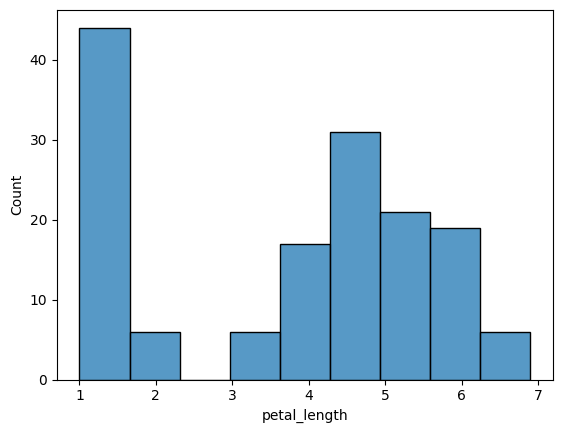

In [ ]:
sns.histplot(dataset['petal_length'])

Converting Object to numerical value using LabelEncoder

In [ ]:
le = LabelEncoder()
dataset['species'] = le.fit_transform(dataset['species'])

###Checking correlation using Heatmap

<Axes: >

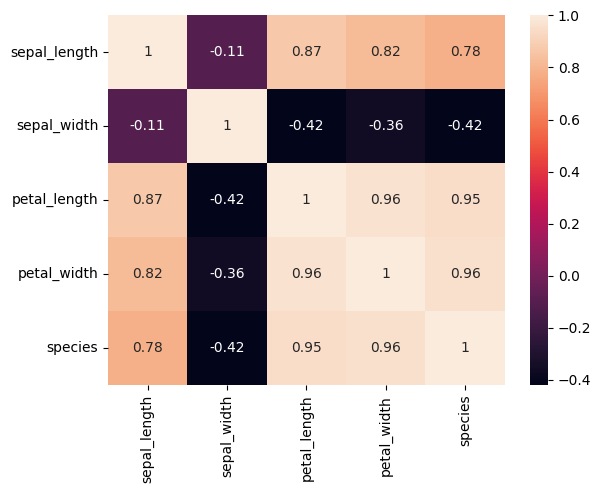

In [ ]:
sns.heatmap(dataset.corr(),annot = True)

###Checking for outliers using boxplot

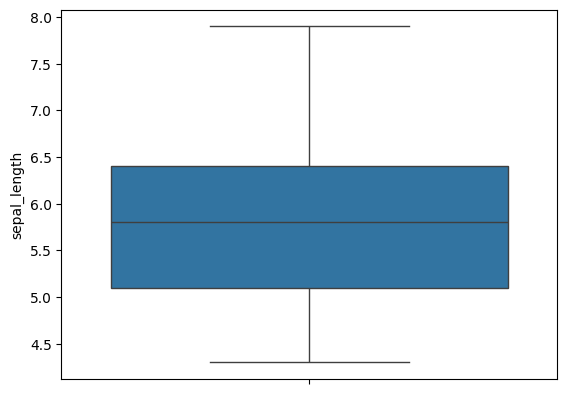

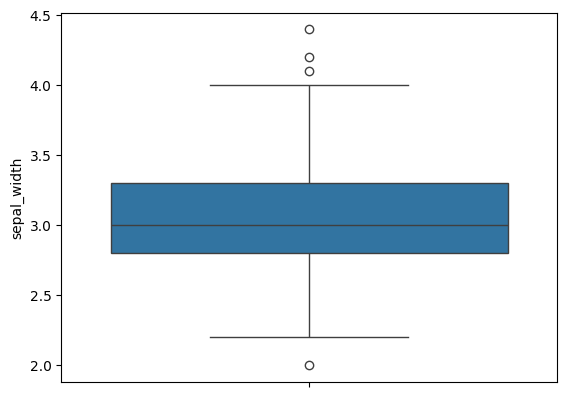

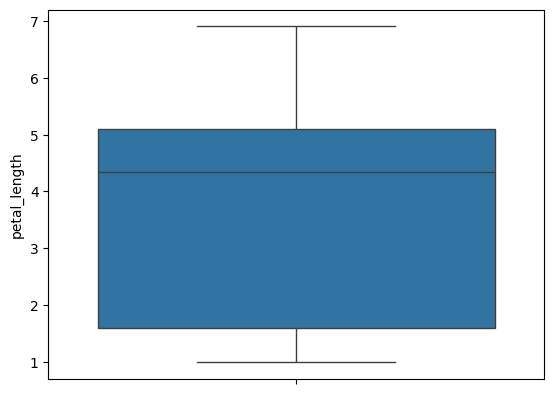

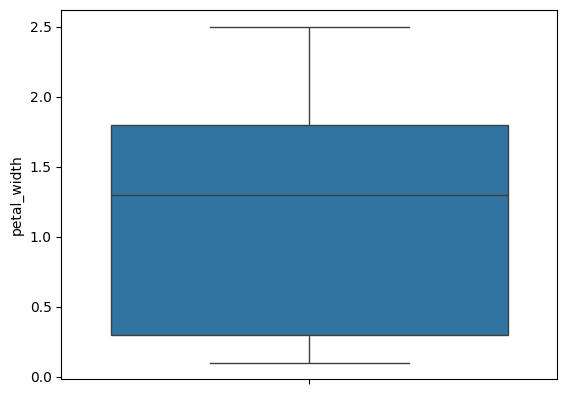

In [ ]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
for i in columns:
  sns.boxplot(dataset[i])
  plt.show()

# Model Building

###Splitting features and labels

In [ ]:
features = dataset.iloc[:,:-1]
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
label = dataset.iloc[:,-1]
label

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


Scaling the values

In [ ]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Splitting into training and testing values

In [ ]:
features_train,features_test,label_train,label_test = train_test_split(features,label,test_size = 0.3,random_state = 18)

Using RandomForest Algorithm to build a model

In [ ]:
model = RandomForestClassifier()
model.fit(features_train,label_train)

RandomForestClassifier()

Predicting and displaying the accuracy

In [ ]:
prediction = model.predict(features_test)

In [ ]:
print(accuracy_score(label_test,prediction))

1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



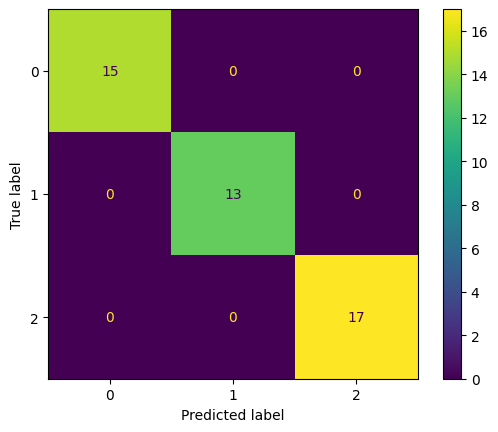

In [ ]:
print(classification_report(label_test,prediction))
print(ConfusionMatrixDisplay.from_predictions(label_test,prediction))

Checking whether the dataset is imbalanced or not

In [ ]:
label.value_counts()

,count
species,
0,50
1,50
2,50


Hyperparameter Tuning

In [ ]:
parameters = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9]
}

Searching for the best parameters

In [ ]:
grid = GridSearchCV(model,param_grid = parameters)
grid.fit(features_train,label_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [25, 50, 100, 150]})

In [ ]:
print(grid.best_estimator_)

RandomForestClassifier(max_depth=3, max_features=None, n_estimators=25)


Building the new model

In [ ]:
rf_hyper = RandomForestClassifier(max_depth=3, max_features=None, n_estimators=25)
rf_hyper.fit(features_train,label_train)

RandomForestClassifier(max_depth=3, max_features=None, n_estimators=25)

In [ ]:
pred2 = rf_hyper.predict(features_test)

In [ ]:
print(accuracy_score(label_test,pred2))

1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



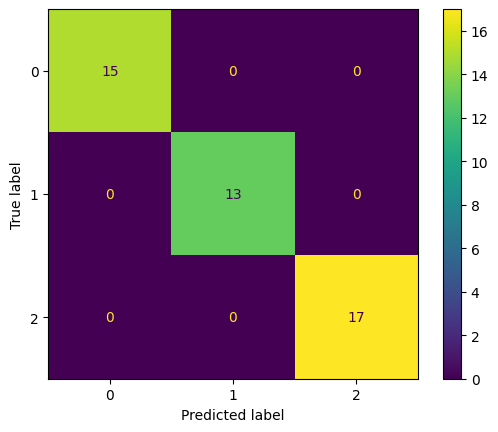

In [ ]:
print(classification_report(label_test,pred2))
print(ConfusionMatrixDisplay.from_predictions(label_test,pred2))

Predicting new values

In [ ]:
new = rf_hyper.predict(scaler.transform([[4.7,3.2,1.3,0.2]]))

In [ ]:
predicted = le.inverse_transform(new)
print(predicted)

['Iris-setosa']
